<a href="https://colab.research.google.com/github/DanielRios1/predicciones-ventas/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [151]:
import pandas as pd
import numpy as np

In [152]:
filename = "/content/sales_predictions.csv"
df = pd.read_csv(filename)
df_copy = df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Se puede ver que el dataset posee valores nulos para las columnas "Item_Weight" y "Outlet_Size".

In [154]:
df.duplicated().sum()

0

No posee valores duplicados.

In [155]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [156]:
df.columns = df.columns.str.lower()


Se pasan todos los nombres de las columnas a minúsculas para hacer mas fácil el trabajo.

In [157]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Se detectan muchos valores NaN en la columna de "item_weight".

In [158]:
item_weight_missing = df["item_weight"].isna()

In [159]:
df.loc[item_weight_missing]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [160]:
df[df["item_identifier"]=="FDP10"]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


Debido a que la columna "item_identifier" se refiere a un número de identificación único de cada producto, podemos concluir que todos los valores repetidos corresponden al mismo producto. Por ende, todos tendrán el mismo peso, y de esta forma podremos completar algunos datos faltantes de la columna "item_weight".

In [161]:
dicc = {}
for i in df.index:
  if pd.isnull(df["item_weight"][i]):
    x = df["item_identifier"][i]
    dicc[x]=""
print(dicc)

{'FDP10': '', 'DRI11': '', 'FDW12': '', 'FDC37': '', 'FDC14': '', 'FDV20': '', 'FDX10': '', 'FDB34': '', 'FDS02': '', 'FDI26': '', 'FDF09': '', 'FDY40': '', 'FDY45': '', 'FDN48': '', 'NCL18': '', 'FDR12': '', 'FDQ49': '', 'FDU04': '', 'NCP18': '', 'FDD10': '', 'DRE60': '', 'FDW39': '', 'FDX34': '', 'FDY25': '', 'NCR53': '', 'FDH35': '', 'DRK12': '', 'FDR07': '', 'NCB30': '', 'DRY23': '', 'FDQ28': '', 'NCO17': '', 'FDT12': '', 'FDO08': '', 'NCX06': '', 'FDE40': '', 'FDX49': '', 'FDI24': '', 'FDS45': '', 'NCO07': '', 'DRF27': '', 'FDX25': '', 'NCX42': '', 'FDG33': '', 'DRM47': '', 'FDS46': '', 'FDX21': '', 'NCU05': '', 'DRF15': '', 'FDQ04': '', 'FDH19': '', 'FDZ10': '', 'NCF07': '', 'FDJ08': '', 'FDM25': '', 'FDV60': '', 'FDV13': '', 'FDM50': '', 'FDY31': '', 'DRQ35': '', 'NCW17': '', 'FDN60': '', 'FDN58': '', 'FDC41': '', 'FDO01': '', 'FDY49': '', 'FDJ22': '', 'FDN39': '', 'FDJ56': '', 'FDX26': '', 'FDZ07': '', 'NCW53': '', 'FDX31': '', 'FDR43': '', 'FDP22': '', 'FDU02': '', 'NCK31': ''

Se genera diccionario con las id de cada producto.

In [162]:
for id in dicc:
  for e in range(0, len(df["item_identifier"])):
    if id == df["item_identifier"][e] and pd.notnull(df["item_weight"][e]):
      dicc[id]=df["item_weight"][e]
print(dicc)

{'FDP10': 19.0, 'DRI11': 8.26, 'FDW12': 8.315, 'FDC37': 15.5, 'FDC14': 14.5, 'FDV20': 20.2, 'FDX10': 6.385, 'FDB34': 15.25, 'FDS02': 10.195, 'FDI26': 5.94, 'FDF09': 6.215, 'FDY40': 15.5, 'FDY45': 17.5, 'FDN48': 13.35, 'NCL18': 18.85, 'FDR12': 12.6, 'FDQ49': 20.2, 'FDU04': 7.93, 'NCP18': 12.15, 'FDD10': 20.6, 'DRE60': 9.395, 'FDW39': 6.69, 'FDX34': 6.195, 'FDY25': 12.0, 'NCR53': 12.15, 'FDH35': 18.25, 'DRK12': 9.5, 'FDR07': 21.35, 'NCB30': 14.6, 'DRY23': 9.395, 'FDQ28': 14.0, 'NCO17': 10.0, 'FDT12': 6.215, 'FDO08': 11.1, 'NCX06': 17.6, 'FDE40': 15.6, 'FDX49': 4.615, 'FDI24': 10.3, 'FDS45': 5.175, 'NCO07': 9.06, 'DRF27': 8.93, 'FDX25': 16.7, 'NCX42': 6.36, 'FDG33': 5.365, 'DRM47': 9.3, 'FDS46': 17.6, 'FDX21': 7.05, 'NCU05': 11.8, 'DRF15': 18.35, 'FDQ04': 6.4, 'FDH19': 19.35, 'FDZ10': 17.85, 'NCF07': 9.0, 'FDJ08': 11.1, 'FDM25': 10.695, 'FDV60': 20.2, 'FDV13': 17.35, 'FDM50': 13.0, 'FDY31': 5.98, 'DRQ35': 9.3, 'NCW17': 18.0, 'FDN60': 15.1, 'FDN58': 13.8, 'FDC41': 15.6, 'FDO01': 21.1, 'FDY

Luego a cada id se le asigna el peso correspondiente.

In [163]:
dicc["FDQ60"]

''

In [164]:
for u in df.index:
  if pd.isnull(df["item_weight"][u]):
    for id in dicc:
      if id == df["item_identifier"][u] and dicc[id]!="":
        df["item_weight"][u] = dicc[id]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Se detectan los valores NaN en la columna "item_weight" y se busca su peso correspondiente en el diccionario antes creado. Luego, la iteración va agregando los valores correspondientes a "item_weight" en el dataframe.

In [165]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [166]:
df[df["item_weight"].isnull()]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Aún existen 4 valores NaN en la columna "item_weight", que corresponden a valores únicos en "item_identifier".

In [167]:
itemw_missing = df["item_weight"].isna()

In [168]:
df = df.loc[~itemw_missing,:]

Los 4 valores que aún permaneces como NaN, serán eliminados de la muestra, ya que no hay forma de conocer sus pesos.

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8519 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8519 non-null   object 
 3   item_visibility            8519 non-null   float64
 4   item_type                  8519 non-null   object 
 5   item_mrp                   8519 non-null   float64
 6   outlet_identifier          8519 non-null   object 
 7   outlet_establishment_year  8519 non-null   int64  
 8   outlet_size                6109 non-null   object 
 9   outlet_location_type       8519 non-null   object 
 10  outlet_type                8519 non-null   object 
 11  item_outlet_sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [170]:
df[df["outlet_size"].isnull()]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Se detectan valores NaN en la columna "outlet_size".

In [171]:
df[(df["outlet_type"]=="Grocery Store")]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [172]:
df.groupby(["outlet_type", "outlet_size"]).count()

item_identifier  item_weight  item_fat_content  \
outlet_type       outlet_size                                                   
Grocery Store     Small                    527          527               527   
Supermarket Type1 High                     932          932               932   
                  Medium                   930          930               930   
                  Small                   1860         1860              1860   
Supermarket Type2 Medium                   928          928               928   
Supermarket Type3 Medium                   932          932               932   

                               item_visibility  item_type  item_mrp  \
outlet_type       outlet_size                                         
Grocery Store     Small                    527        527       527   
Supermarket Type1 High                     932        932       932   
                  Medium                   930        930       930   
                  Small                   1860       1860      1860   
Supermarket Type2 Medium                   928        928       928   
Supermarket Type3 Medium                   932        932       932   

                               outlet_identifier  outlet_establishment_year  \
outlet_type       outlet_size                                                 
Grocery Store     Small                      527                        527   
Supermarket Type1 High                       932                        932   
                  Medium                     930                        930   
                  Small                     1860                       1860   
Supermarket Type2 Medium                     928                        928   
Supermarket Type3 Medium                     932                        932   

                               outlet_location_type  item_outlet_sales  
outlet_type       outlet_size                                           
Grocery Store     Small                         527                527  
Supermarket Type1 High                          932                932  
                  Medium                        930                930  
                  Small                        1860               1860  
Supermarket Type2 Medium                        928                928  
Supermarket Type3 Medium                        932                932

La totalidad de los valores "Grocery Store" en la columna "outlet_type", corresponden a un valor "Small" en la columna "outlet_size". 
De la misma forma, la totalidad de "Supermarket Type2" y "Supermarket Type3" en la columna "outlet_type", corresponden a un valor "Medium" en la columna "outlet_size".
Se utilizará esta información para rellenar los valores NaN en la columna "outlet_size".

In [173]:
for a in df.index:
  if pd.isnull(df["outlet_size"][a]) and df["outlet_type"][a]=="Grocery Store":
    df["outlet_size"][a]="Small"
  elif pd.isnull(df["outlet_size"][a]) and df["outlet_type"][a]=="Supermarket Type2":
    df["outlet_size"][a]="Medium"
  elif pd.isnull(df["outlet_size"][a]) and df["outlet_type"][a]=="Supermarket Type3":
    df["outlet_size"][a]="Medium"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8519 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8519 non-null   object 
 3   item_visibility            8519 non-null   float64
 4   item_type                  8519 non-null   object 
 5   item_mrp                   8519 non-null   float64
 6   outlet_identifier          8519 non-null   object 
 7   outlet_establishment_year  8519 non-null   int64  
 8   outlet_size                6664 non-null   object 
 9   outlet_location_type       8519 non-null   object 
 10  outlet_type                8519 non-null   object 
 11  item_outlet_sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [175]:
df[df["outlet_size"].isnull()]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [176]:
df.groupby(["outlet_location_type", "outlet_type", "outlet_size"]).count()

item_identifier  \
outlet_location_type outlet_type       outlet_size                    
Tier 1               Grocery Store     Small                    527   
                     Supermarket Type1 Medium                   930   
                                       Small                    930   
Tier 2               Supermarket Type1 Small                    930   
Tier 3               Grocery Store     Small                    555   
                     Supermarket Type1 High                     932   
                     Supermarket Type2 Medium                   928   
                     Supermarket Type3 Medium                   932   

                                                    item_weight  \
outlet_location_type outlet_type       outlet_size                
Tier 1               Grocery Store     Small                527   
                     Supermarket Type1 Medium               930   
                                       Small                930   
Tier 2               Supermarket Type1 Small                930   
Tier 3               Grocery Store     Small                555   
                     Supermarket Type1 High                 932   
                     Supermarket Type2 Medium               928   
                     Supermarket Type3 Medium               932   

                                                    item_fat_content  \
outlet_location_type outlet_type       outlet_size                     
Tier 1               Grocery Store     Small                     527   
                     Supermarket Type1 Medium                    930   
                                       Small                     930   
Tier 2               Supermarket Type1 Small                     930   
Tier 3               Grocery Store     Small                     555   
                     Supermarket Type1 High                      932   
                     Supermarket Type2 Medium                    928   
                     Supermarket Type3 Medium                    932   

                                                    item_visibility  \
outlet_location_type outlet_type       outlet_size                    
Tier 1               Grocery Store     Small                    527   
                     Supermarket Type1 Medium                   930   
                                       Small                    930   
Tier 2               Supermarket Type1 Small                    930   
Tier 3               Grocery Store     Small                    555   
                     Supermarket Type1 High                     932   
                     Supermarket Type2 Medium                   928   
                     Supermarket Type3 Medium                   932   

                                                    item_type  item_mrp  \
outlet_location_type outlet_type       outlet_size                        
Tier 1               Grocery Store     Small              527       527   
                     Supermarket Type1 Medium             930       930   
                                       Small              930       930   
Tier 2               Supermarket Type1 Small              930       930   
Tier 3               Grocery Store     Small              555       555   
                     Supermarket Type1 High               932       932   
                     Supermarket Type2 Medium             928       928   
                     Supermarket Type3 Medium             932       932   

                                                    outlet_identifier  \
outlet_location_type outlet_type       outlet_size                      
Tier 1               Grocery Store     Small                      527   
                     Supermarket Type1 Medium                     930   
                                       Small                      930   
Tier 2               Supermarket Type1 Small                      930   
Tier 3               Grocery Store     Small     

Se puede observar que la totalidad de valores "Tier 2" en la columna "outlet_location_type", están ligados con "Supermarket Type1" en "outlet_type" y "Small" en "outlet_size".
Por lo tanto, los valores NaN que aún existen en "outlet_size" y que cumplan con las condiciones antes mencionadas ("Tier 2" y "Supermarket Type1"), serán rellenados con "Small".

In [177]:
for n in df.index:
  if pd.isnull(df["outlet_size"][n]) and df["outlet_type"][n]=="Supermarket Type1" and df["outlet_location_type"][n]=="Tier 2":
    df["outlet_size"][n]="Small"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8519 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8519 non-null   object 
 3   item_visibility            8519 non-null   float64
 4   item_type                  8519 non-null   object 
 5   item_mrp                   8519 non-null   float64
 6   outlet_identifier          8519 non-null   object 
 7   outlet_establishment_year  8519 non-null   int64  
 8   outlet_size                8519 non-null   object 
 9   outlet_location_type       8519 non-null   object 
 10  outlet_type                8519 non-null   object 
 11  item_outlet_sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


El dataset ya no posee valores nulos y se puede comenzar a trabajar con el.

In [179]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [180]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
grafico11 = df.groupby(["outlet_type"])[["item_outlet_sales"]].sum()
grafico11

,item_outlet_sales
outlet_type,
Grocery Store,3.679138e+05
Supermarket Type1,1.291734e+07
Supermarket Type2,1.851823e+06
Supermarket Type3,3.444468e+06


Se realiza una agrupación de los tipos de locales, sumando las ventas totales de cada uno.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


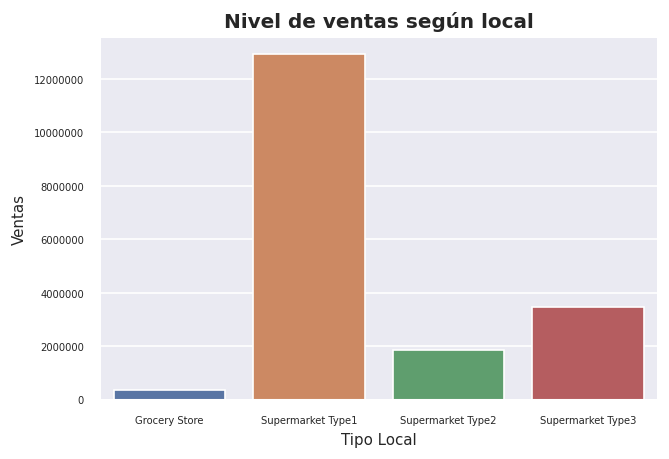

In [183]:
plt.figure(dpi=120)
sns.barplot(grafico11.index, grafico11["item_outlet_sales"])
plt.title("Nivel de ventas según local", fontweight="bold")
plt.xlabel("Tipo Local", fontsize=9)
plt.ylabel("Ventas", fontsize=9)
plt.tick_params(axis="x", labelsize=6)
plt.tick_params(axis="y", labelsize=6)
plt.ticklabel_format(axis="y", style="plain")

plt.show()

En este gráfico podemos ver como el tipo de local "Supermarket Type1" es el que más ventas obtiene, seguido por el "Supermarket Type3".

In [184]:
grafico21 = df.groupby(["outlet_type"])[["item_mrp"]].sum()
grafico22 = df.groupby(["outlet_type"])[["item_mrp"]].count()
grafico22

,item_mrp
outlet_type,
Grocery Store,1082
Supermarket Type1,5577
Supermarket Type2,928
Supermarket Type3,932


Se realiza una agrupación de los tipos de locales, sumando los precios que maneja cada uno y haciendo un conteo de estos mismos, para obtener que tipo de local posee los productos más caros en su conjunto y con cuantos productos cuentan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


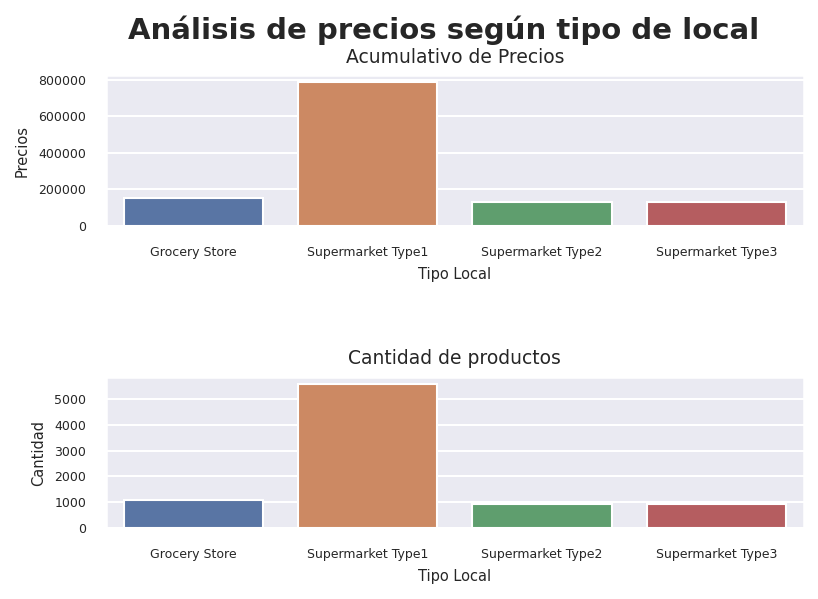

In [185]:
fig = plt.figure(dpi=150)
fig.suptitle("Análisis de precios según tipo de local", fontsize=14, fontweight="bold")
fig.subplots_adjust(hspace=1, wspace=0.5)

#fig1
ax = fig.add_subplot(2,1,1)
sns.barplot(grafico21.index, grafico21["item_mrp"])
ax.set_title("Acumulativo de Precios", fontsize=9)
ax.set_xlabel("Tipo Local", fontsize=7)
ax.set_ylabel("Precios", fontsize=7)
ax.tick_params(axis="x", labelsize=6)
ax.tick_params(axis="y", labelsize=6)


#fig2
ax2 = fig.add_subplot(2,1,2)
sns.barplot(grafico22.index, grafico22["item_mrp"])
ax2.set_title("Cantidad de productos", fontsize=9)
ax2.set_xlabel("Tipo Local", fontsize=7)
ax2.set_ylabel("Cantidad", fontsize=7)
ax2.tick_params(axis="x", labelsize=6)
ax2.tick_params(axis="y", labelsize=6)

En ambos gráficos el tipo de local "Supermarket Type1" supera ampliamente al resto. Podemos concluir que este tipo de local es el más grande, pues cuenta con un catálogo de productos más grande y más caro.

In [186]:
df["item_fat_content"].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64

In [187]:
df["item_fat_content"] = df["item_fat_content"].replace(["LF", "reg", "low fat"],["Low Fat", "Regular", "Low Fat"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Se detectan valores diversos para hacer referencia a los dos tipos de productos "Low Fat" y "Regular. Por lo tanto, se reemplazan los valores para que todo quede ordenado.

In [188]:
df["item_fat_content"].value_counts()

Low Fat    5516
Regular    3003
Name: item_fat_content, dtype: int64

In [189]:
grafico31 = df.groupby(["item_fat_content"])[["item_outlet_sales"]].sum()
grafico31

,item_outlet_sales
item_fat_content,
Low Fat,1.189966e+07
Regular,6.681887e+06


Se realiza una agrupación por tipo de producto y se suman las ventas totales en cada tipo.

In [190]:
g32 = df.groupby(["item_fat_content"])[["item_outlet_sales"]].count()
g32

,item_outlet_sales
item_fat_content,
Low Fat,5516
Regular,3003


Se realiza una agrupación por tipo de producto y se hace una cuenta para ver cuantos productos hay de cada tipo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


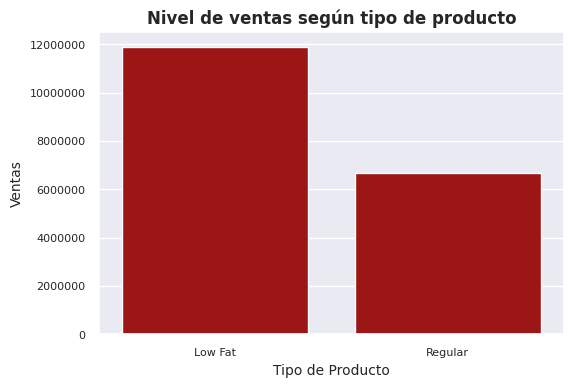

In [191]:
plt.figure(dpi=100)

sns.barplot(grafico31.index, grafico31["item_outlet_sales"], color="#B20000")
plt.title("Nivel de ventas según tipo de producto", fontsize=12, fontweight="bold")
plt.xlabel("Tipo de Producto", fontsize=10)
plt.ylabel("Ventas", fontsize=10)
plt.tick_params(axis="x", labelsize=8)
plt.tick_params(axis="y", labelsize=8)
plt.ticklabel_format(axis="y", style="plain")


plt.show()

Se puede observar en el gráfico que el tipo de producto "Low Fat" posee mayor cantidad de ventas que "Regular.

In [192]:
g33 = df.groupby(["item_fat_content"])[["item_visibility"]].sum()
g33

,item_visibility
item_fat_content,
Low Fat,354.829161
Regular,208.382041


Se agrupa por tipo de producto y se suman las visibilidades en góndola.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


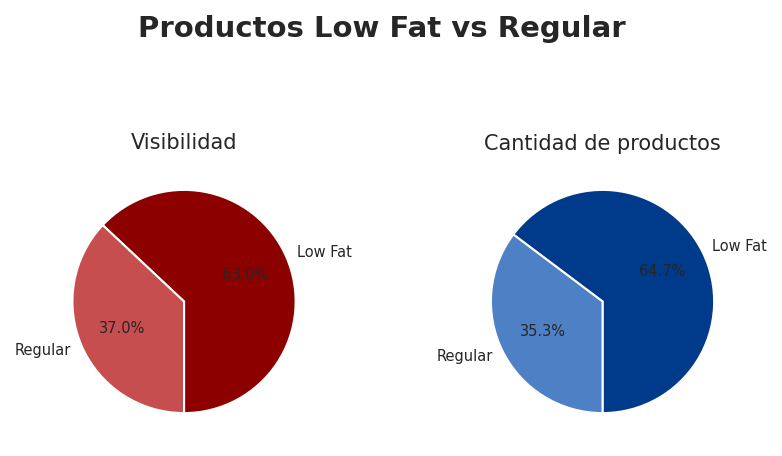

In [193]:
fig = plt.figure(dpi=150)
fig.suptitle("Productos Low Fat vs Regular", fontsize=14, fontweight="bold")
fig.subplots_adjust(hspace=.5, wspace=0.5)

#fig1
ax = fig.add_subplot(1,2,1)
ax.set_title("Visibilidad", fontsize=10)
plt.pie(g33, autopct="%.1f%%", labels=["Low Fat", "Regular"], colors=["#8D0000", "#C64E4E"], startangle=-90, textprops = {'fontsize':7})

#fig2
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Cantidad de productos", fontsize=10)
plt.pie(g32, autopct="%.1f%%", labels=["Low Fat", "Regular"], colors=["#003A8B", "#4E80C6"], startangle=-90, textprops = {'fontsize':7})

plt.show()

Al comparar productos "Low Fat" vs "Regular, se puede ver que en el catálogo de productos hay más presencia de productos "Low Fat" (64.7% vs 35.3%). Además, estos últimos también tienen mayor visibilidad en las góndolas.

In [194]:
df["item_type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

In [195]:
df["outlet_type"].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: outlet_type, dtype: int64

In [196]:
filtro_s1 = df["outlet_type"] == "Supermarket Type1"
filtro_s2 = df["outlet_type"] == "Supermarket Type2"
filtro_s3 = df["outlet_type"] == "Supermarket Type3"
filtro_s4 = df["outlet_type"] == "Grocery Store"

grafico1 = df.loc[filtro_s1]
grafico2 = df.loc[filtro_s2]
grafico3 = df.loc[filtro_s3]
grafico4 = df.loc[filtro_s4]

Se generan 4 dataframe nuevos, para cada tipo de local.

In [197]:
grafico4["outlet_type"].value_counts()

Grocery Store    1082
Name: outlet_type, dtype: int64

In [198]:
grafico41 = grafico1.groupby(["item_type"])[["item_outlet_sales"]].sum().sort_values(by=["item_outlet_sales"], ascending = False).head(5)
grafico42 = grafico2.groupby(["item_type"])[["item_outlet_sales"]].sum().sort_values(by=["item_outlet_sales"], ascending = False).head(5)
grafico43 = grafico3.groupby(["item_type"])[["item_outlet_sales"]].sum().sort_values(by=["item_outlet_sales"], ascending = False).head(5)
grafico44 = grafico4.groupby(["item_type"])[["item_outlet_sales"]].sum().sort_values(by=["item_outlet_sales"], ascending = False).head(5)
grafico44

,item_outlet_sales
item_type,
Snack Foods,51596.1710
Fruits and Vegetables,48602.0684
Household,43707.1068
Frozen Foods,33195.4564
Dairy,31451.7262


Se agrupan los productos según tipo de local y se suman sus ventas totales, según la categoría a la que pertenezcan. Luego estas sumas, se ordenan de mayor a menor y se filtran las primeras cinco.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

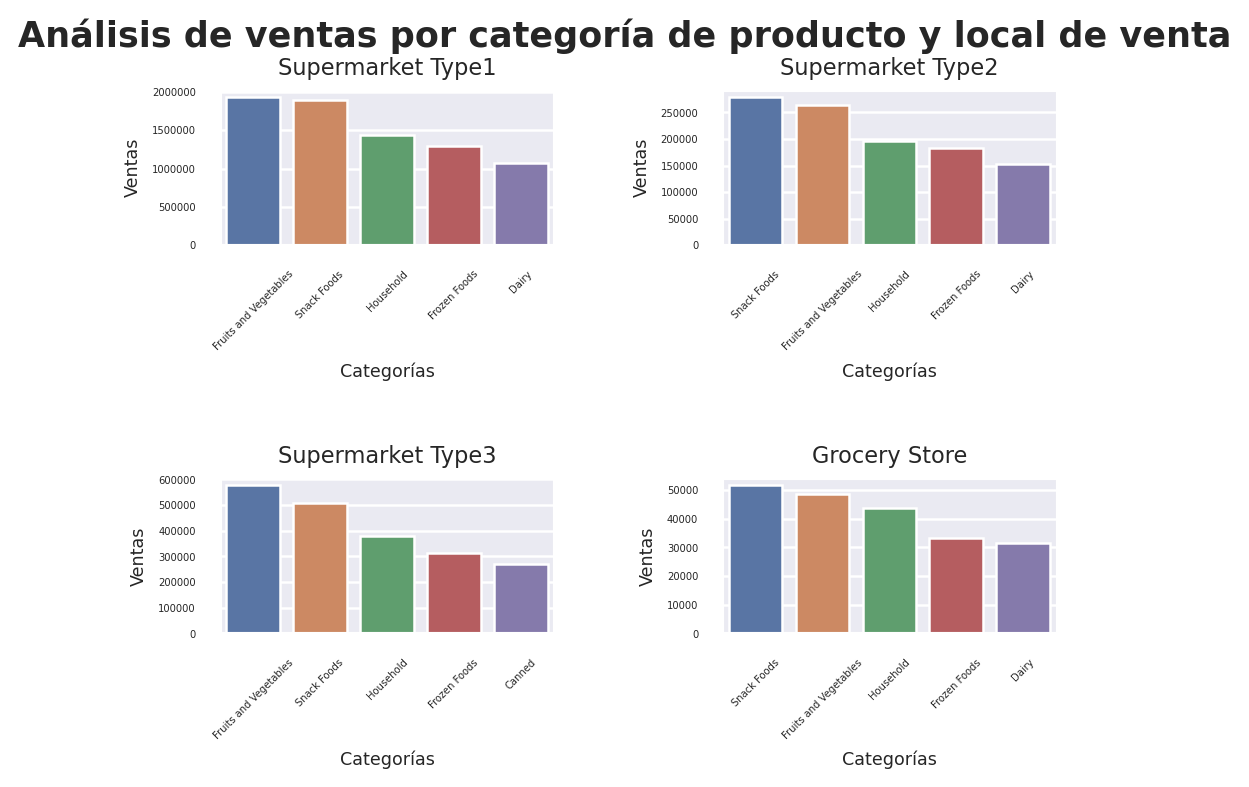

In [199]:
fig = plt.figure(dpi=180)
fig.suptitle("Análisis de ventas por categoría de producto y local de venta", fontsize=14, fontweight="bold")
fig.subplots_adjust(hspace=1.5, wspace=0.5)

#fig1
ax = fig.add_subplot(2,2,1)
sns.barplot(grafico41.index, grafico41["item_outlet_sales"])
ax.set_title("Supermarket Type1", fontsize=9)
ax.set_xlabel("Categorías", fontsize=7)
ax.set_ylabel("Ventas", fontsize=7)
ax.tick_params(axis="x", labelsize=4, rotation=45)
ax.tick_params(axis="y", labelsize=4)
ax.ticklabel_format(axis="y", style="plain")


#fig2
ax2 = fig.add_subplot(2,2,2)
sns.barplot(grafico42.index, grafico42["item_outlet_sales"])
ax2.set_title("Supermarket Type2", fontsize=9)
ax2.set_xlabel("Categorías", fontsize=7)
ax2.set_ylabel("Ventas", fontsize=7)
ax2.tick_params(axis="x", labelsize=4, rotation=45)
ax2.tick_params(axis="y", labelsize=4)

#fig3
ax3 = fig.add_subplot(2,2,3)
sns.barplot(grafico43.index, grafico43["item_outlet_sales"])
ax3.set_title("Supermarket Type3", fontsize=9)
ax3.set_xlabel("Categorías", fontsize=7)
ax3.set_ylabel("Ventas", fontsize=7)
ax3.tick_params(axis="x", labelsize=4, rotation=45)
ax3.tick_params(axis="y", labelsize=4)

#fig4
ax4 = fig.add_subplot(2,2,4)
sns.barplot(grafico44.index, grafico44["item_outlet_sales"])
ax4.set_title("Grocery Store", fontsize=9)
ax4.set_xlabel("Categorías", fontsize=7)
ax4.set_ylabel("Ventas", fontsize=7)
ax4.tick_params(axis="x", labelsize=4, rotation=45)
ax4.tick_params(axis="y", labelsize=4)

plt.show();

En el gráfico podemos ver que en los cuatro tipos de locales se mantienen como las categorías con más ventas "Fruits and Vegetables" (Frutas y verduras) y "Snack Foods" (Alimentos de aperitivo), alternando el primer y segundo lugar. Mientras que en tercer y cuarto lugar, se repiten siempre "Household" (Productos para la limpieza y mantención del hogar) y "Frozen Foods" (Alimentos congelados), respectivamente. Finalmente, en quinto lugar aparece "Dairy" (Lácteos) en casi todos los tipos de locales, salvo en "Supermarket Type3", donde la categoría es desplazada por "Canned" (Conservas).

In [200]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8519 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8519 non-null   object 
 3   item_visibility            8519 non-null   float64
 4   item_type                  8519 non-null   object 
 5   item_mrp                   8519 non-null   float64
 6   outlet_identifier          8519 non-null   object 
 7   outlet_establishment_year  8519 non-null   int64  
 8   outlet_size                8519 non-null   object 
 9   outlet_location_type       8519 non-null   object 
 10  outlet_type                8519 non-null   object 
 11  item_outlet_sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [201]:
df["item_mrp"].value_counts()

172.0422    7
188.1872    6
142.0154    6
170.5422    6
196.5084    6
           ..
83.1934     1
96.6752     1
152.6682    1
180.5660    1
75.4670     1
Name: item_mrp, Length: 5936, dtype: int64

# Histogramas precios

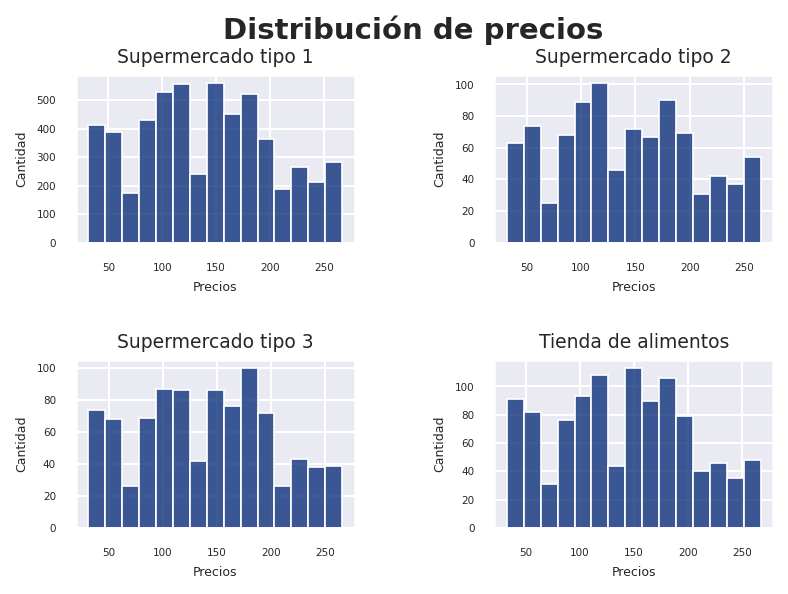

In [202]:
fig = plt.figure(dpi=150)
fig.suptitle("Distribución de precios", fontsize=14, fontweight="bold")
fig.subplots_adjust(hspace=0.7, wspace=0.5)

#fig1
ax = fig.add_subplot(2,2,1)
ax.set_title("Supermercado tipo 1", fontsize=9)
sns.set(style="darkgrid")
sns.histplot(grafico1["item_mrp"], bins=15, color="#002674")
ax.set_xlabel("Precios", fontsize=6)
ax.set_ylabel("Cantidad", fontsize=6)
ax.tick_params(axis="x", labelsize=5)
ax.tick_params(axis="y", labelsize=5)


#fig2
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Supermercado tipo 2", fontsize=9)
sns.set(style="darkgrid")
sns.histplot(grafico2["item_mrp"], bins=15, color="#002674")
ax2.set_xlabel("Precios", fontsize=6)
ax2.set_ylabel("Cantidad", fontsize=6)
ax2.tick_params(axis="x", labelsize=5)
ax2.tick_params(axis="y", labelsize=5)

#fig3
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Supermercado tipo 3", fontsize=9)
sns.set(style="darkgrid")
sns.histplot(grafico3["item_mrp"], bins=15, color="#002674")
ax3.set_xlabel("Precios", fontsize=6)
ax3.set_ylabel("Cantidad", fontsize=6)
ax3.tick_params(axis="x", labelsize=5)
ax3.tick_params(axis="y", labelsize=5)

#fig4
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Tienda de alimentos", fontsize=9)
sns.set(style="darkgrid")
sns.histplot(grafico4["item_mrp"], bins=15, color="#002674")
ax4.set_xlabel("Precios", fontsize=6)
ax4.set_ylabel("Cantidad", fontsize=6)
ax4.tick_params(axis="x", labelsize=5)
ax4.tick_params(axis="y", labelsize=5)

plt.show();

Se puede ver en estos gráficos de distribución de precios, que para los 4 tipos de tienda, se maneja un catálogo de productos similar, ya que ninguna se destaca por tener precios más económicos o más caros, como si sucede en algunas cadenas grandes de supermercados, donde manejan diferentes catálogos de productos y precios para cada tipo de local.

# Matriz de Correlación

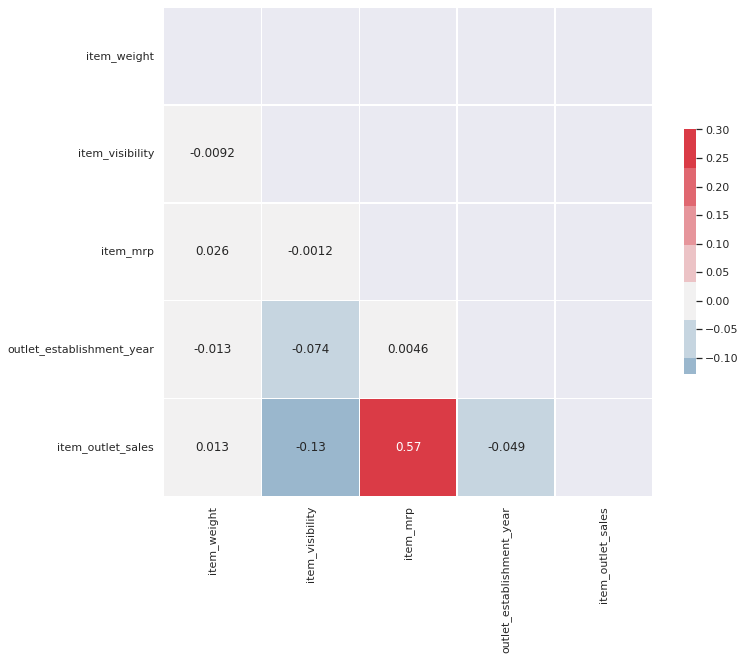

In [203]:
correlation= df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se puede ver que no hay grandes correlaciones entre las variables, sólo se puede destacar la correlación positiva entre "item_mrp" e "item_outlet_sales". Además existe cierta correlación negativa entre "item_outlet sales" e "item_visibility".

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8519 non-null   object 
 1   item_weight                8519 non-null   float64
 2   item_fat_content           8519 non-null   object 
 3   item_visibility            8519 non-null   float64
 4   item_type                  8519 non-null   object 
 5   item_mrp                   8519 non-null   float64
 6   outlet_identifier          8519 non-null   object 
 7   outlet_establishment_year  8519 non-null   int64  
 8   outlet_size                8519 non-null   object 
 9   outlet_location_type       8519 non-null   object 
 10  outlet_type                8519 non-null   object 
 11  item_outlet_sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [205]:
df.head(20)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [206]:
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [207]:
listac = ['item_fat_content', 'item_type', 'outlet_size', 'outlet_location_type', 'outlet_type', "outlet_establishment_year"]

for i in listac:
  z = df[i].unique()
  print(i, z)

item_fat_content ['Low Fat' 'Regular']
item_type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
outlet_size ['Medium' 'Small' 'High']
outlet_location_type ['Tier 1' 'Tier 3' 'Tier 2']
outlet_type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
outlet_establishment_year [1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [208]:
df["item_fat_content"] = df["item_fat_content"].map({"Low Fat":0, "Regular":1}, na_action=None)
df["outlet_size"] = df["outlet_size"].map({"Small":0, "Medium":1, "High":2}, na_action=None)
df["outlet_location_type"] = df["outlet_location_type"].map({"Tier 1":1, "Tier 2":2, "Tier 3":3}, na_action=None)
df["outlet_type"] = df["outlet_type"].map({"Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3":3, "Grocery Store":4}, na_action=None)

df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,1,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,1,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,3,4,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,3,1,994.7052


In [210]:
df_dumm = pd.get_dummies(data=df, columns=["item_type"], drop_first=False)
df_dumm.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,...,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009,1,3,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1998,0,3,4,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,1987,2,3,1,...,0,0,0,1,0,0,0,0,0,0


Se convierte la columna "item_type" a dummy, para poder ingresar estos datos a los modelos de predicción.

In [211]:
df_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   item_identifier                  8519 non-null   object 
 1   item_weight                      8519 non-null   float64
 2   item_fat_content                 8519 non-null   int64  
 3   item_visibility                  8519 non-null   float64
 4   item_mrp                         8519 non-null   float64
 5   outlet_identifier                8519 non-null   object 
 6   outlet_establishment_year        8519 non-null   int64  
 7   outlet_size                      8519 non-null   int64  
 8   outlet_location_type             8519 non-null   int64  
 9   outlet_type                      8519 non-null   int64  
 10  item_outlet_sales                8519 non-null   float64
 11  item_type_Baking Goods           8519 non-null   uint8  
 12  item_type_Breads    

# Modelos

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## KNN Regresor

In [379]:
X = df_dumm.drop(columns=["item_identifier", "outlet_identifier", "item_outlet_sales", "outlet_establishment_year"])
y = df_dumm["item_outlet_sales"]

X

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_size,outlet_location_type,outlet_type,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,...,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods
0,9.300,0,0.016047,249.8092,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,1,3,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,0,3,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,2,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,2,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,0,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,1,3,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [380]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5, random_state=123)

Se separan los datos en 70% para entrenamiento, 15% para testeo y 15% para validación.

### Escalamiento

In [381]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train

array([[-0.4829525 , -0.7362216 , -1.05822952, ..., -0.40324285,
        -0.2321766 , -0.12993334],
       [-0.54767858,  1.3582867 , -0.30577225, ..., -0.40324285,
        -0.2321766 , -0.12993334],
       [ 0.05643153, -0.7362216 , -0.87207949, ..., -0.40324285,
        -0.2321766 , -0.12993334],
       ...,
       [-1.31036759,  1.3582867 ,  0.41826045, ..., -0.40324285,
        -0.2321766 , -0.12993334],
       [ 1.29701479, -0.7362216 ,  1.4651137 , ..., -0.40324285,
        -0.2321766 , -0.12993334],
       [ 0.46636339, -0.7362216 ,  1.03170744, ...,  2.47989518,
        -0.2321766 , -0.12993334]])

In [344]:
# OPTIMIZACIÓN POR R2
# r2=0
# k=1
# while (r2<=0.45):
#     X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
#     X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
#     X_val = scaler.transform(X_val)
#     knn = KNeighborsRegressor(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred=knn.predict(X_test)
#     r2=r2_score(y_test, y_pred)
#     print(k, r2)
#     k=k+1

In [382]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
r2_score(y_test, y_pred_knn)

0.3147736675042532

In [383]:
# OPTIMIZACIÓN POR GRID
from sklearn.model_selection import GridSearchCV
k = list(range(1, 21))
param_grid = dict(n_neighbors=k)
  

grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
grid.best_estimator_.get_params()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [384]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.08461182 0.31107402 0.37704397 0.40201654 0.42213041 0.41917281
 0.42459254 0.42237415 0.42053817 0.41860956 0.41714935 0.4153366
 0.41349993 0.41081019 0.40715065 0.40610345 0.40292647 0.40137544
 0.39848674 0.39398023] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}]


In [385]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
r2_score(y_test, y_pred_knn)

0.44880249666242933

Se entrena el modelo en base a las variables X_train e y_train, y se realizan pruebas para los datos de testeo.

In [386]:
y_pred_knn=knn.predict(X_val)
y_pred_knn

array([ 184.04614286, 1471.22777143, 2699.1532    , ..., 1806.03005714,
       1282.42591429, 1599.06137143])

Se obtienen los valores de predicción en base a X_val.

In [387]:
r2_knn=r2_score(y_val, y_pred_knn)
print(r2_knn)

0.45903975049260415


Se obtiene un R2 de 45%, lo que es bastante bajo. El modelo no logra explicar satisfactoriamente nuestra variable objetivo.

## Regresión

In [432]:
X = df_dumm.drop(columns=["item_identifier", "outlet_identifier", "item_outlet_sales", "outlet_establishment_year"])
y = df_dumm["item_outlet_sales"]

X

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_size,outlet_location_type,outlet_type,item_type_Baking Goods,item_type_Breads,item_type_Breakfast,...,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,item_type_Meat,item_type_Others,item_type_Seafood,item_type_Snack Foods,item_type_Soft Drinks,item_type_Starchy Foods
0,9.300,0,0.016047,249.8092,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,1,3,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,0,3,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,2,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,2,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,0,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,1,3,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)


Se separan los datos en 70% para entrenamiento y 30% para testeo.

### Escalamiento

In [434]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.59640514,  1.34677031, -0.83672535, ..., -0.40565888,
        -0.23232442, -0.13101213],
       [-0.95923773, -0.74251711,  0.1143457 , ..., -0.40565888,
        -0.23232442, -0.13101213],
       [-0.72102724,  1.34677031,  0.74601539, ..., -0.40565888,
        -0.23232442, -0.13101213],
       ...,
       [ 1.32693626,  1.34677031,  2.02786527, ..., -0.40565888,
        -0.23232442, -0.13101213],
       [-1.2642765 , -0.74251711, -0.48507794, ..., -0.40565888,
        -0.23232442, -0.13101213],
       [-0.96570498, -0.74251711,  0.11298042, ..., -0.40565888,
        -0.23232442, -0.13101213]])

In [435]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_) 

El bias calculado es 2189.830939613304
La pendiente calculada es:  [-6.55021801e+00  2.71177889e+00 -1.14256003e+02  9.65334148e+02
  1.49073827e+02  1.86159768e+02 -3.64525902e+02 -1.29852411e+15
 -8.29314497e+14 -5.53832262e+14 -1.31767577e+15 -1.30871223e+15
 -1.44372438e+15 -1.71969855e+15 -7.47601585e+14 -1.16527626e+15
 -1.49585895e+15 -1.08545658e+15 -7.08698117e+14 -4.24498521e+14
 -1.69930024e+15 -1.07531420e+15 -6.28334834e+14]


In [436]:
y_pred_reg=lin_reg.predict(X_test)
r2_reg = r2_score(y_test, y_pred_reg)
print(r2_reg)

0.4048830158484412


El modelo posee un R2 de 40%, lo que no es muy bueno. El modelo no logra explicar de gran manera nuestra variable objetivo.